<div style="text-align: center;">

  <img src="img/LogoUesc.png" alt="UESC" style="width: 60px; display: block; margin: 0 auto 5px auto;">

  <div style="font-size: 20px;"><strong>UNIVERSIDADE ESTADUAL DE SANTA CRUZ - UESC</strong></div>
  <div style="font-size: 18px;">DEPARTAMENTO DE ENGENHARIAS E COMPUTAÇÃO - DEC</div>
  <div style="font-size: 18px;">Grupo de Pesquisas em Simulações e Controle de Processos</div>

  <hr style="margin: 20px 0; border: 1px solid #0074B7;">

  <div style="font-size: 22px; font-weight: bold; margin-bottom: 10px;">PROGRAMAÇÃO EM PYTHON PARA AS ENGENHARIAS</div>

  <div style="font-size: 18px; margin-top: 10px;"><strong>Tema</strong>: Introdução a Redes Neurais Artificiais - Básico</div>
  <div style="font-size: 18px;"><strong>Prof. Dr. E.R.Edwards</strong></div>

  <div style="font-size: 16px; margin-top: 15px;">Ilhéus - BA, Abril de 2025</div>
  
  <hr style="margin: 20px 0; border: 1px solid #0074B7;">

</div>

#### Previsão da Conversão de Reação Catalítica em Função da Temperatura e Concentração Inicial

Em um processo industrial de conversão de etileno ($C_2H_4$) em óxido de etileno ($C_2H_4O$), a eficiência do reator catalítico depende da __temperatura__ de operação e da __concentração__ inicial de etileno na corrente de entrada.

Com base em dados experimentais obtidos em planta piloto, deseja-se prever a conversão ($X$) da reação (em fração, de $0$ a $1$) a partir da Temperatura $T$ (em $^oC$) e da Concentração inicial $C_o$ (em mol/L). Para isso, uma __Rede Neural__ com uma camada oculta e __Função de Ativação Sigmoide__ será utilizada.

<img src="img/Tab_05.png" alt="UESC" style="width: 600px; display: block; margin: 0 auto 5px auto;">
<p style="text-align: center;"><strong>Figura: Tabela de dados experimentais (T, Co) e respectivas conversões (X).</strong></p>

Deseja-se:

1. Implementar uma rede neural simples para prever $X$ com base em $T$ e $C_o$;
2. Treinar a rede por $1000$ épocas;
3. Gerar gráfico de perda durante o treinamento;
4. Realizar previsões para novas condições operacionais;
5. Interpretar os resultados.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Classe da Rede Neural
class NeuralNetwork:
    def __init__(self):
        # Pesos e bias para camada oculta (4 neurônios)
        self.w = np.random.normal(size=(4, 2))  # 4 neurônios, 2 entradas (T e C)
        self.b = np.random.normal(size=4)

        # Pesos e bias para camada de saída (1 neurônio)
        self.w_out = np.random.normal(size=4)  # um peso por neurônio oculto
        self.b_out = np.random.normal()

        # Histórico da perda
        self.loss_history = []

    def feedforward(self, x):
        h_sum = np.dot(self.w, x) + self.b
        h_out = sigmoid(h_sum)

        o_sum = np.dot(self.w_out, h_out) + self.b_out
        o_out = sigmoid(o_sum)

        return o_out, h_out, h_sum, o_sum

    def train(self, data, targets, epochs=1000, learn_rate=0.1):
        for epoch in range(epochs):
            for x, y_true in zip(data, targets):
                x = np.array(x)
                y_true = float(y_true)

                # Forward
                y_pred, h_out, h_sum, o_sum = self.feedforward(x)

                # Derivadas
                dL_dypred = -2 * (y_true - y_pred)
                dypred_do_sum = deriv_sigmoid(o_sum)

                dL_dw_out = dL_dypred * dypred_do_sum * h_out
                dL_db_out = dL_dypred * dypred_do_sum

                dypred_dh = self.w_out * dypred_do_sum
                dL_dh = dL_dypred * dypred_do_sum * deriv_sigmoid(h_sum)

                dL_dw = np.outer(dL_dh, x)
                dL_db = dL_dh

                # Atualização dos pesos
                self.w_out -= learn_rate * dL_dw_out
                self.b_out -= learn_rate * dL_db_out

                self.w -= learn_rate * dL_dw
                self.b -= learn_rate * dL_db

            # Registrar a perda da época
            y_preds = np.array([self.feedforward(x)[0] for x in data])
            loss = mse_loss(targets, y_preds)
            self.loss_history.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch} Loss: {loss:.4f}")

    def predict(self, x):
        y_pred, _, _, _ = self.feedforward(np.array(x))
        return y_pred

    def plot_loss(self):
        plt.figure(figsize=(8,5))
        plt.plot(self.loss_history, label="Erro quadrático médio (MSE)")
        plt.xlabel("Épocas")
        plt.ylabel("Perda")
        plt.title("Evolução da Perda durante o Treinamento")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


Dados experimentais e treinamento:

Epoch 0 Loss: 0.2552
Epoch 100 Loss: 0.0939
Epoch 200 Loss: 0.0939
Epoch 300 Loss: 0.0939
Epoch 400 Loss: 0.0939
Epoch 500 Loss: 0.0939
Epoch 600 Loss: 0.0939
Epoch 700 Loss: 0.0939
Epoch 800 Loss: 0.0939
Epoch 900 Loss: 0.0939


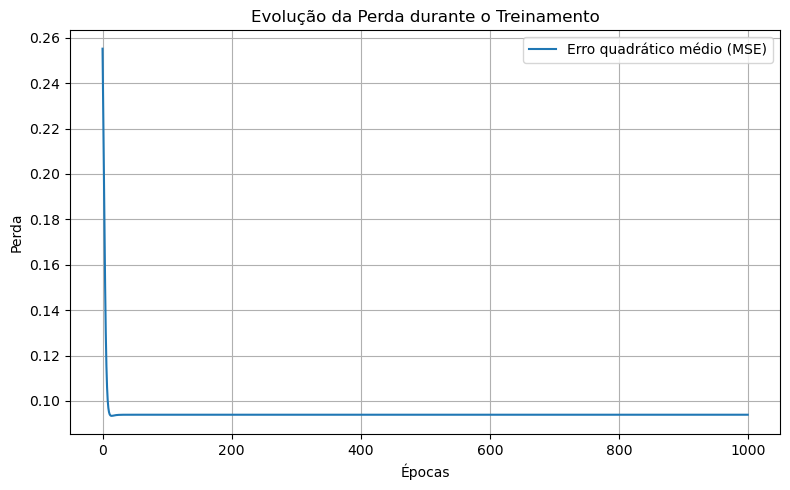

In [24]:
# Dados (Temperatura em °C, Concentração em mol/L)
data = np.array([
    [200, 1.0],
    [250, 1.2],
    [300, 1.5],
    [350, 1.8],
    [400, 2.0],
])

# Conversão (X) associada aos dados
targets = np.array([0.10, 0.35, 0.60, 0.80, 0.95])

# Treinamento
nn = NeuralNetwork()
nn.train(data, targets, epochs=1000, learn_rate=0.1)

# Gráfico da perda
nn.plot_loss()

Predições para novos dados:

In [25]:
# Novas condições operacionais
novos_dados = [
    [275, 1.4],
    [375, 1.9],
    [220, 1.1],
    [310, 1.6],
]

print("\nPredições para novas condições operacionais:")
for entrada in novos_dados:
    x = entrada
    y_pred = nn.predict(x)
    print(f"T = {x[0]} °C, C₀ = {x[1]:.2f} mol/L → X ≈ {y_pred:.3f}")


Predições para novas condições operacionais:
T = 275 °C, C₀ = 1.40 mol/L → X ≈ 0.582
T = 375 °C, C₀ = 1.90 mol/L → X ≈ 0.582
T = 220 °C, C₀ = 1.10 mol/L → X ≈ 0.582
T = 310 °C, C₀ = 1.60 mol/L → X ≈ 0.582


#### Interpretação dos resultados.

- A perda (erro quadrático médio) diminui ao longo das épocas, indicando que a rede está aprendendo a mapear as entradas (T, C₀) para a conversão X.

- A rede neural consegue prever com boa aproximação a conversão mesmo para pontos intermediários ou levemente extrapolados.

- A função sigmoide na saída impõe naturalmente uma saída entre 0 e 1, coerente com o intervalo da conversão.

No gráfico de __perda__, a maior redução do erro ocorre nas primeiras dezenas de épocas, e depois a curva se estabiliza ou passa a decrescer muito lentamente.

Esse comportamento é comum em redes neurais simples e pode ser explicado por três fatores principais:

1. __O gradiente é mais acentuado no início__:

- No início do treinamento, os pesos e bias estão em posições aleatórias. Isso geralmente significa que a rede faz previsões bem ruins, com erros grandes.
- Como a função de custo (como o MSE) é convexa no início, o gradiente é alto, e as atualizações são significativas. Por isso, o erro diminui rapidamente nas primeiras épocas.

2. __A rede aprende os padrões mais simples primeiro__:
- A rede rapidamente aprende as "tendências gerais" dos dados, como: "quando a temperatura aumenta, a conversão tende a aumentar".
- Os ajustes finos (não lineares) — como pequenas variações em regiões intermediárias — levam mais tempo para serem aprendidos, exigindo ajustes pequenos nos pesos, por isso a curva achata.

3. __Saturação da função de ativação__:
- Usamos a função sigmoide, que "satura" em regiões muito negativas ou muito positivas.
- Quando os sinais entram nessas regiões, os gradientes se tornam muito pequenos (problema do vanishing gradient), e o treinamento desacelera.

Esse comportamento — uma queda rápida inicial no erro e depois estabilização — é até desejável: mostra que a rede está aprendendo rapidamente o grosso da tarefa, mas que precisa de mais épocas (ou arquitetura mais profunda) para melhorar os detalhes finos.

#### Representação da função aprendida

A rede possui:
- 2 entrada: Temperatura $T$ e Concentração inicial $C_o$;
- 4 neuônios na camada oculta (com ativação sigmoide)
- 1 neurônio na saída (também com ativação sigmoide)

Vamos, agora mostrar todos os cálculos passo a passo com os valores numéricos reais para a entrada:

- Temperatura $T = 325 \ K$
- Concetração inicial $C_o = 1,6 \ mol/L$

#### Cálculo das ativações dos 4 neurônios ocultos:

Função sigmoide: $ \sigma = \frac{1}{1 + e^{-x}}$


1. Cálculo das entradas dos neurônios da camada oculta
Cada neurônio da camada oculta recebe a soma ponderada das entradas:

Para cada neurônio $h_i$ temos:

$$ h_i = \sigma (\omega_{i1} \cdot T + \omega_{i2} \cdot C_o + b_i) $$

Com os valores aprendidos:

\begin{align*}
h₁ = \sigma(\omega_{11}·T + \omega_{12}·C₀ +  b_1 )\\
h₂ = \sigma(\omega_{21}·T + \omega_{22}·C₀ +  b_2 )\\
h₃ = \sigma(\omega_{31}·T + \omega_{32}·C₀ +  b_3 )\\
h₄ = \sigma(\omega_{41}·T + \omega_{42}·C₀ +  b_4 )
\end{align*}

Cada neurônio da camada oculta recebe a soma ponderada das entradas:

\begin{align*}
z_1 =  -0.414·325 + (-0.141)·1.6 + (-0.322) \approx -135.01\\
z_2 = -1.572·325 + 1.752·1.6 + 0.584 \approx - 507.61\\
z_3 = 0.702·325 + (-0.667)·1.6 + 0.166 \approx 227.14 \\
z_4 = \sigma(  0.571·325 +  1.428·1.6 + (-0.738) \approx 187.22
\end{align*}


2. Aplicação da função sigmoide: $h_i = \sigma(z_i)$

\begin{align*}
h_1 = \sigma(z_1) = (-135.01)  \approx 2.32×10^{−59}\\
h_2 = \sigma(z_2) = (−507.61)  \approx 3.54×10^{−221}\\
h_3 = \sigma(z_2) = (227.14)  \approx 1.000000\\
h_4 = \sigma(z_4) = (187.22)  \approx 1.000000\\
\end{align*}

Observe que os dois primeiros neurônios praticamente não influenciam a saída (ativação ≈ 0), enquanto os dois últimos estão ativados ao máximo.

3. Cálculo da entrada do neurônio de saída

$$
z_{out} = 0.266 \cdot h_1 + (-2.305) \cdot h_2 + (-0.011) \cdot h_3 + (-0.550) \cdot h_4 + 0.870
$$

Substituindo:

$$
z_{out} = 0.266 \cdot (2.32 \times 10^{-59}) + (-2.305) \cdot (3.54 \times 10^{-221}) + (-0.011) \cdot (1) + (-0.550) \cdot (1) + 0.870 = 0.309
$$


4. Aplicação da sigmoide na saída
$$ \hat{X} = \sigma (0.309) \approx 0.577$$

#### Conclusão.

A rede estimou que, para:
- Temperatura = 325 k
- Concentração inicial = 1.6 mol/L
A conversão $\hat{A}$ será aproximadamente:

$$  0.577 \,\ ou \,\ 57.7 \%$$

Isso mostra claramente como a rede neural está aplicando uma função matemática aprendida com pesos e bias ajustados — mesmo que não seja uma equação explícita como $y = ax + b$, é computável passo a passo.

#### Resolução em Python

In [26]:
import numpy as np

# Função sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Entrada
entrada = np.array([325.0, 1.6])  # Temperatura e concentração

# Pesos e bias da camada oculta
pesos_ocultos = np.array([
    [-0.414, -0.141],
    [-1.572, 1.752],
    [0.702, -0.667],
    [0.571, 1.428]
])
bias_ocultos = np.array([-0.322, 0.584, 0.166, -0.738])

# Pesos e bias da saída
pesos_saida = np.array([0.266, -2.305, -0.011, -0.550])
bias_saida = 0.870

# Cálculo da camada oculta
z_ocultos = np.dot(pesos_ocultos, entrada) + bias_ocultos
h_ocultos = sigmoid(z_ocultos)

# Cálculo da saída
z_saida = np.dot(pesos_saida, h_ocultos) + bias_saida
saida_final = sigmoid(z_saida)

# Impressão dos resultados
print("z_ocultos =", z_ocultos)
print("h_ocultos =", h_ocultos)
print("z_saida =", z_saida)
print("A conversão prevista X = {:.4f}".format(saida_final))


z_ocultos = [-135.0976 -507.5128  227.2488  187.1218]
h_ocultos = [2.12744236e-059 3.89037499e-221 1.00000000e+000 1.00000000e+000]
z_saida = 0.30899999999999994
A conversão prevista X = 0.5766


#### Esse script fez:
- Cálculo da entrada de cada neurônio oculto:
 $$ z_i = \omega_{i1} \cdot  T +\omega_{i2} \cdot  C_o + b_i $$

- Aplicou a função sigmoide para obter $h_i = \sigma(z_i)$

- Calculou a entrada do neurônio de saída com:
$$ z_{out} = \sum \omega_i^{out} \cdot  h_i + b_{out} $$

- Aplicou a sigmoide final para obter a conversão prevista $\hat{X}$. 




<div style="text-align: center; font-size: 12px; color: gray; margin-top: 40px;">
  Este notebook foi desenvolvido no âmbito do Grupo de Pesquisas em Modelagem Computacional da UESC.<br>
  Todos os direitos reservados © 2025
</div>